# Bank Marketing 


The Dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

Citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
from May 2008 to November 2010

* Personal Informations:
1. age (numeric)

2. job:(categorical:'admin.','bluecollar','entrepreneur','housemaid', 'management','retired','selfemployed','services','student','technician','unemployed','unknown')

3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5. default: has credit in default? (categorical: "no","yes","unknown")

6. housing: has housing loan? (categorical: "no","yes","unknown")

7. loan: has personal loan? (categorical: "no","yes","unknown")

* Related with the last contact of the current campaign:
8. contact: contact communication type (categorical: "cellular","telephone") 
9. month: last contact month of year (categorical)
10. day_of_week: last contact day of the week (categorical)
11. duration: last contact duration, in seconds (numeric)

* Other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

* Social and economic context attributes:
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)   
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

* Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: "yes","no")

## Importing Packages and Data

In [43]:
import pandas as pd
import numpy as np
from numpy import mean
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from tabulate import tabulate
from calendar import month_name, day_name



from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, cross_validate
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.ensemble import EasyEnsembleClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve
from sklearn import svm, tree, metrics
from sklearn.calibration import CalibratedClassifierCV
import parfit.parfit as pf
from sklearn.metrics import make_scorer, precision_recall_fscore_support

from xgboost import XGBClassifier

In [11]:
df_initial = pd.read_csv("./data/bank-additional-full.csv", delimiter = ";")
df_initial.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
df_initial.shape

(41188, 21)

In [13]:
df_initial.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
df_initial.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [15]:
df_initial.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
df_initial.duplicated().sum()

12

In [17]:
df_initial.drop_duplicates(keep="first", inplace=True)

In [18]:
print("Percentage of yes answers is %.2f" %(df_initial.y.value_counts()[1]/(df_initial.y.value_counts().sum())*100))

Percentage of yes answers is 11.27


So the default model will predict "no" in about 9 times of of 10.

In [19]:
months = [x[:3].lower() for x in month_name]

month_grouped = df_initial.groupby("month")["age"].count().reset_index().rename(columns = {"age":"count"})
month_grouped['month'] = pd.Categorical(month_grouped['month'] , categories = months, ordered=True)
month_grouped.sort_values(by = "month", inplace=True)
month_grouped

,month,count
5,mar,546
0,apr,2631
6,may,13767
4,jun,5318
3,jul,7169
1,aug,6176
9,sep,570
8,oct,717
7,nov,4100
2,dec,182


<AxesSubplot:xlabel='month', ylabel='count'>

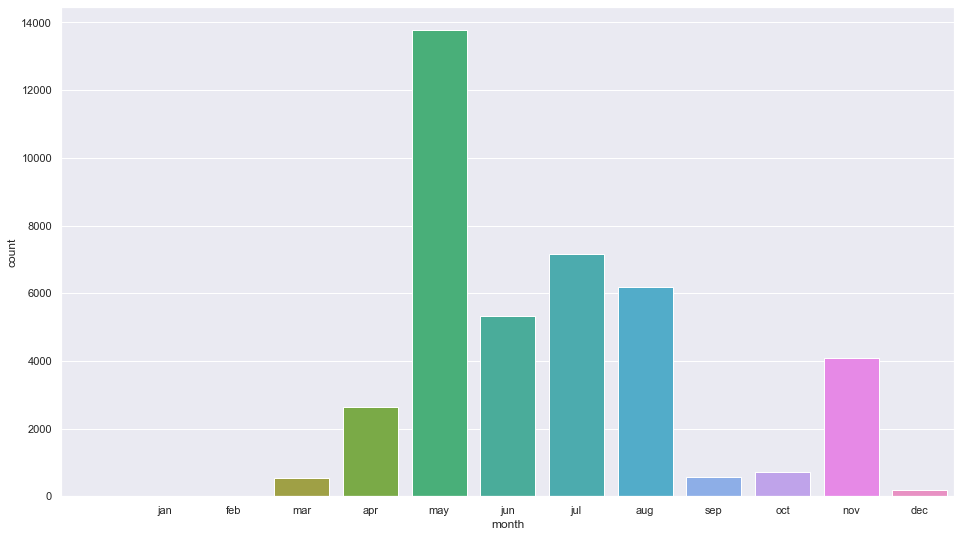

In [20]:
sns.set(rc={'figure.figsize':(16,9)})
sns.barplot(x = "month", y = "count", data=month_grouped)

In [21]:
days = [x[:3].lower() for x in day_name]

day_grouped = df_initial.groupby("day_of_week")["age"].count().reset_index().rename(columns = {"age":"count"})
day_grouped['day_of_week'] = pd.Categorical(day_grouped['day_of_week'] , categories=days, ordered=True)
day_grouped.sort_values(by = "day_of_week", inplace=True)
day_grouped

,day_of_week,count
1,mon,8512
3,tue,8086
4,wed,8134
2,thu,8618
0,fri,7826


Text(0.5, 1.0, 'Days when Clients were contacted')

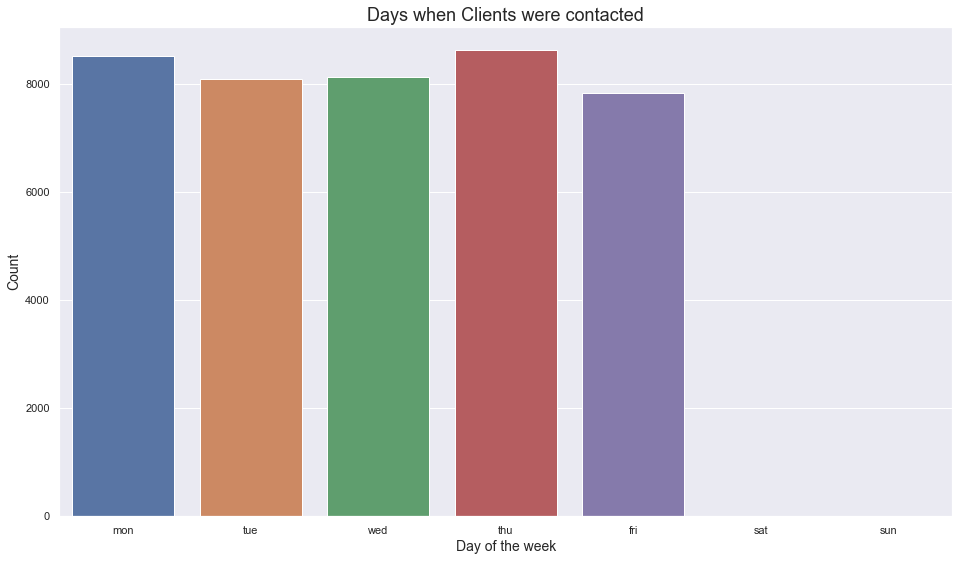

In [22]:
ax = sns.barplot(x = "day_of_week", y = "count", data=day_grouped)
ax.set_xlabel("Day of the week", fontsize = 14)
ax.set_ylabel("Count", fontsize = 14)
ax.set_title("Days when Clients were contacted", fontsize = 18)

In [23]:
df_initial_dtype = pd.DataFrame(df_initial.dtypes).reset_index().rename(columns={0:"dtype"})
num_col = df_initial_dtype[df_initial_dtype.dtype !="object"].index.values
cat_col = df_initial_dtype[df_initial_dtype.dtype =="object"].index.values

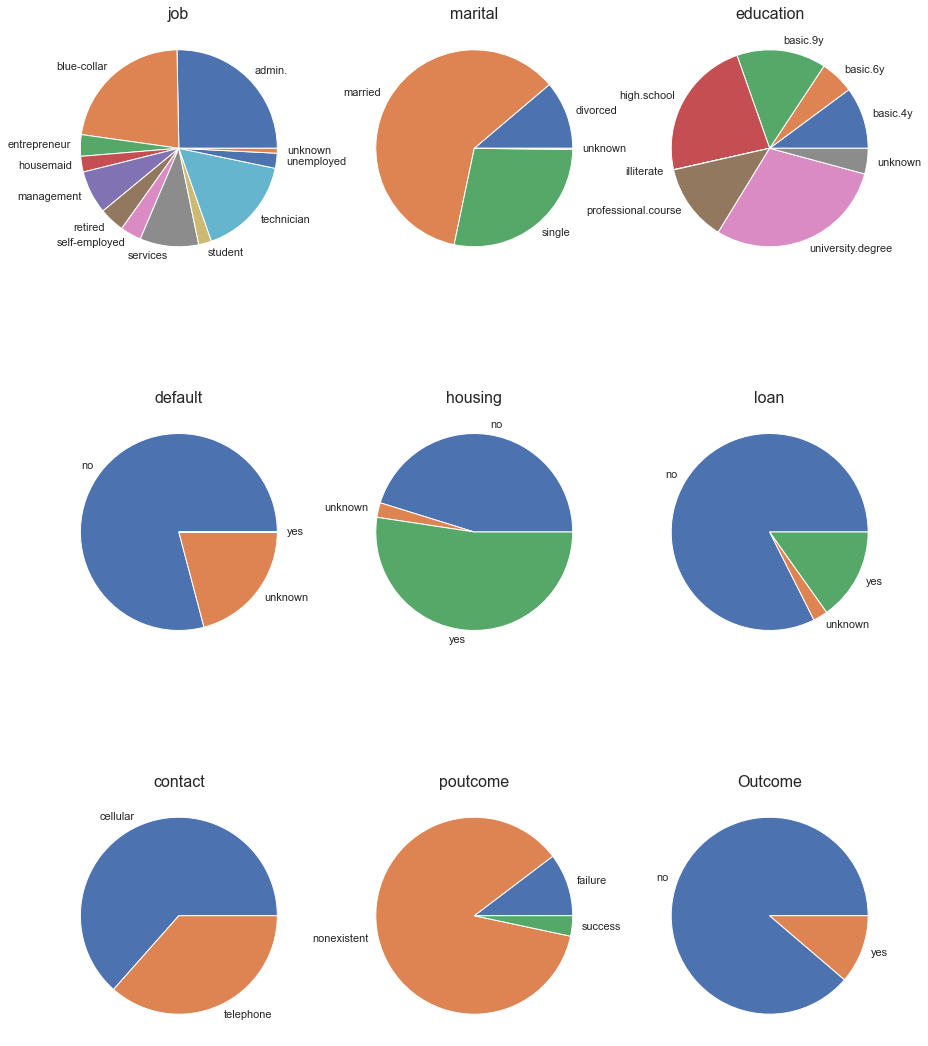

In [24]:
df_cat = df_initial.iloc[: , cat_col].drop(columns = ["month", "day_of_week"])
df_cat = df_cat.rename(columns = {"y":"Outcome"})
fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (15, 20))

for index, col_name in enumerate(df_cat):
    if index < 3:
        row = index
        col = 0
    elif index < 6:
        row = index-3
        col = 1
    else:
        row = index-6
        col = 2
    grouped = df_cat.groupby(col_name).count().reset_index().iloc[:, :2]
    ax[col, row].pie(grouped.iloc[:, 1], labels=grouped[col_name])
    ax[col, row].set_title(col_name, fontsize = 16)

plt.show()

In [25]:
df_initial.iloc[: , num_col]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


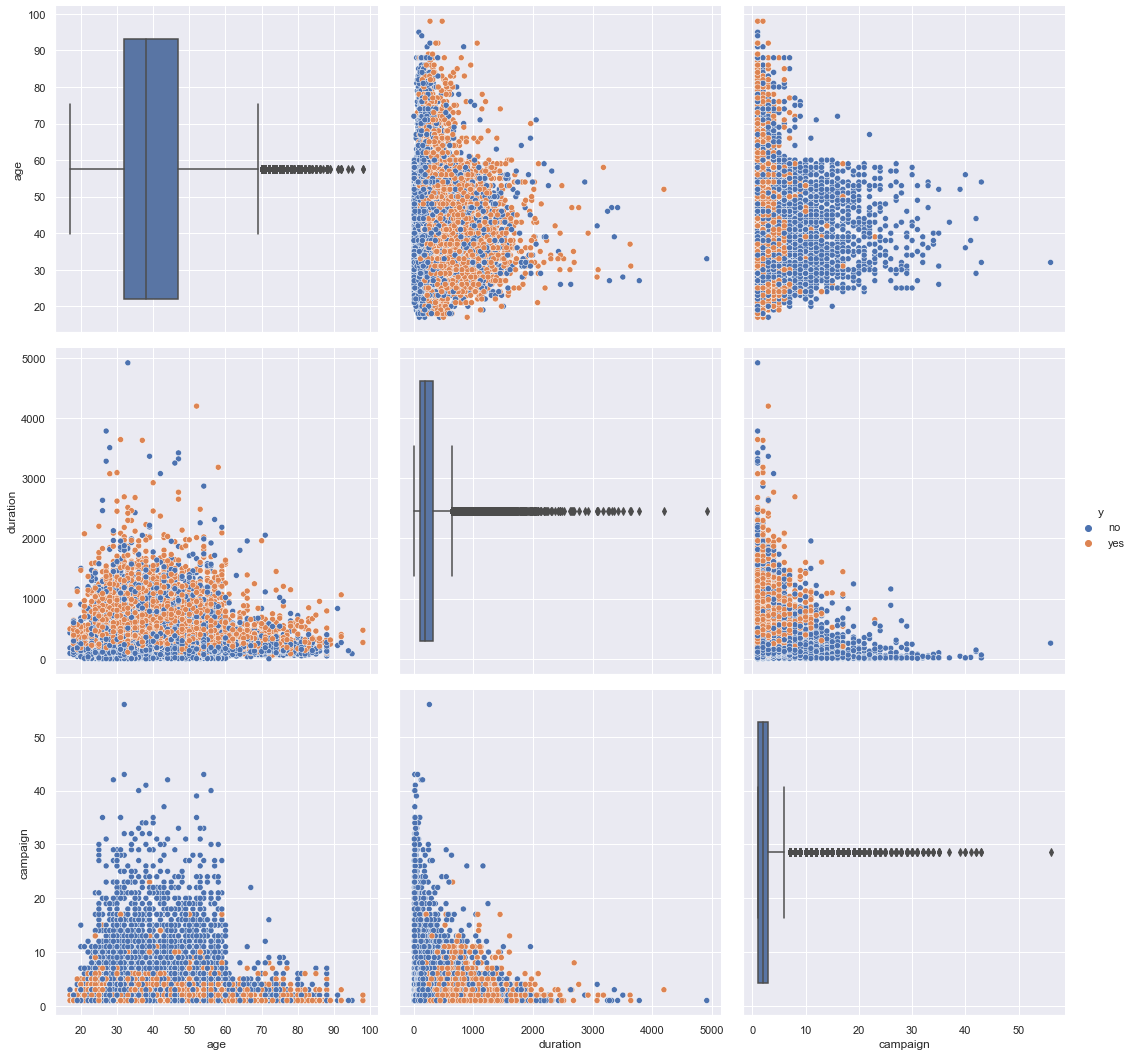

In [188]:
g = sns.PairGrid(df_initial.loc[: , ["age", "duration", "campaign", "y"]], height=5, hue="y")
g.map_diag(sns.boxplot, hue = None)
g.map_offdiag(sns.scatterplot)
g.add_legend()

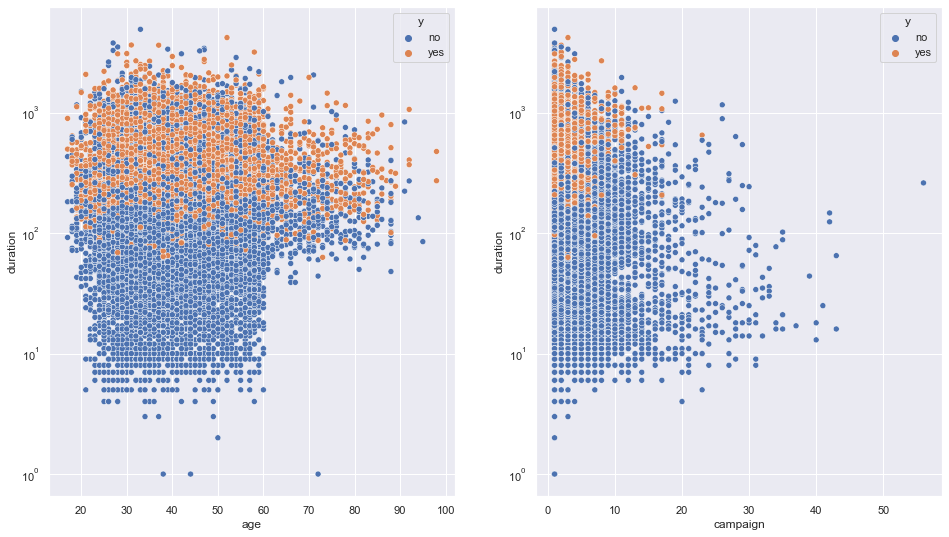

In [203]:
fig, ax =plt.subplots(1,2)

g = sns.scatterplot(data= df_initial, x = "age", y = "duration", hue="y", ax=ax[0])
g.set(yscale = "log")

g = sns.scatterplot(data= df_initial, x = "campaign", y = "duration", hue="y", ax=ax[1])
g.set(yscale = "log")

fig.show()

## Splitting Data 

In [28]:
# Dropping only two columns, duration and y
drop_col = [10, 20]

X = np.delete(df_initial.values, drop_col, 1) 
y = df_initial.iloc[:, 20].values

df_dtype = pd.DataFrame(df_initial.drop(columns=df_initial.iloc[:, (drop_col)].columns, index=1).dtypes)\
            .reset_index().rename(columns={0:"dtype"})

num_col = df_dtype[df_dtype.dtype !="object"].index.values
cat_col = df_dtype[df_dtype.dtype =="object"].index.values

labels = pd.get_dummies(df_initial.drop(df_initial.columns[drop_col], axis =1)).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), cat_col), ('scaler', StandardScaler(), num_col)], 
                      sparse_threshold=0,   remainder = 'passthrough')

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)


### Creating help Functions

In [204]:
# Creating a function with 5-fold cross-validation to evaluate algorithm performance
def cv_result(model, index_name):
    
    scoring_metrics = ["accuracy", "balanced_accuracy", "roc_auc", "f1_macro"]
    
    result = cross_validate(model, X_train, y_train, scoring=scoring_metrics, cv=5, n_jobs = -1)
    
    index = []
    scores = {"Accuracy":[], "Balanced Accuracy": [], "f1 macro": [], "AUC": []} 
    
    index += [index_name]
    
    scores["Accuracy"].append(round(result["test_accuracy"].mean() ,2))
    scores["Balanced Accuracy"].append(round(result["test_balanced_accuracy"].mean() ,2))
    scores["f1 macro"].append(round(result["test_f1_macro"].mean(), 2))
    scores["AUC"].append(round(result["test_roc_auc"].mean() ,2))

    df_scores = pd.DataFrame(scores, index=index)
    return df_scores

In [29]:
# A Function for evaluating algorithms performance on test data
def plot_cm(clf):
    labels = y_test
    predictions = clf.fit(X_train, y_train).predict(X_test)
    
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    y_probas = clf.predict_proba(X_test)
    print('Balanced Accuracy: ', round(metrics.balanced_accuracy_score(labels, predictions), 2))
    print('f1 macro: ', round(metrics.f1_score(labels, predictions, average="macro"), 2))
    print('Recall score yes: ', round(metrics.recall_score(labels, predictions, average="binary", pos_label="yes"), 2))
    print('F1 score yes: ', round(metrics.f1_score(labels, predictions, average="binary", pos_label="yes"), 2))
    print('AUC Score: ', round(metrics.roc_auc_score(labels, y_probas[::,1]), 2))    

## Comparing and choosing the best Classifier

### Dummy Classifier

In [31]:
dummy_clf = DummyClassifier(random_state = 0, strategy="most_frequent")
cv_dummy = cv_result(dummy_clf, "Dummy Classifier")
cv_dummy

,Accuracy,Balanced Accuracy,f1 macro,AUC
Dummy Classifier,0.89,0.5,0.47,0.5


### Logistic Regression

In [32]:
LR_clf = LogisticRegression(random_state = 0)
cv_LR = cv_result(LR_clf, "Linear Regression")
cv_LR

,Accuracy,Balanced Accuracy,f1 macro,AUC
Linear Regression,0.9,0.6,0.64,0.79


In [33]:
LR_clft = LogisticRegression(solver='liblinear', class_weight="balanced", C = 0.3, random_state = 0)
cv_LRt = cv_result(LR_clft, "Linear Regression tuned")
cv_LRt

,Accuracy,Balanced Accuracy,f1 macro,AUC
Linear Regression tuned,0.83,0.74,0.67,0.79


### Decision Tree

In [34]:
DTclf = DecisionTreeClassifier(random_state = 0)
cv_DTC = cv_result(DTclf, "Decision Tree Classifier")
cv_DTC

,Accuracy,Balanced Accuracy,f1 macro,AUC
Decision Tree Classifier,0.84,0.62,0.62,0.62


In [35]:
DTclft = DecisionTreeClassifier(criterion="gini" ,class_weight="balanced", ccp_alpha = 0.002, random_state = 23)
cv_DTCt = cv_result(DTclft, "Decision Tree Classifier tuned")
cv_DTCt

,Accuracy,Balanced Accuracy,f1 macro,AUC
Decision Tree Classifier tuned,0.82,0.73,0.67,0.77


### Random Forest Classifier

In [89]:
RFclf = RandomForestClassifier(random_state=0, n_jobs = -1)
cv_RFclf = cv_result(RFclf, "Random Forest Classifier")
cv_RFclf

,Accuracy,Balanced Accuracy,f1 macro,AUC
Random Forest Classifier,0.89,0.63,0.66,0.77


In [37]:
RFclf = RandomForestClassifier(random_state=0, n_jobs = -1)

scoring = {"AUC": "roc_auc", "f1_macro": "f1_macro"}

params = {"max_depth":[8, 10, 12],
         "n_estimators":[80, 100, 120],
         "ccp_alpha": [0, 0.0001, 0.001],
         "class_weight":["balanced", "balanced_subsample"]}

search = GridSearchCV(RFclf, param_grid=params, scoring=scoring, refit="AUC", cv=5, n_jobs=-1)
search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.0001, 0.001],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [8, 10, 12],
                         'n_estimators': [80, 100, 120]},
             refit='AUC', scoring={'AUC': 'roc_auc', 'f1_macro': 'f1_macro'})

In [38]:
search.best_estimator_

RandomForestClassifier(ccp_alpha=0.0001, class_weight='balanced_subsample',
                       max_depth=12, n_estimators=120, n_jobs=-1,
                       random_state=0)

In [39]:
RFclft = search.best_estimator_
cv_RFclft = cv_result(RFclft, "Random Forest Classifier tuned")
cv_RFclft

,Accuracy,Balanced Accuracy,f1 macro,AUC
Random Forest Classifier tuned,0.86,0.75,0.7,0.8


Balanced Accuracy:  0.76
f1 macro:  0.72
Recall score yes:  0.62
F1 score yes:  0.52
AUC Score:  0.82


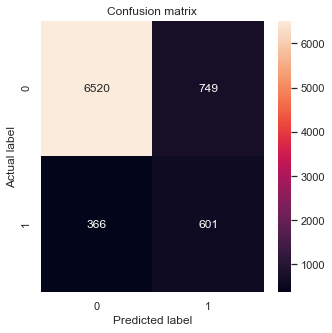

In [40]:
plot_cm(RFclft)

### Summary

In [44]:
pd.concat([cv_dummy, cv_LR, cv_LRt, cv_DTC, cv_DTCt, cv_RFclf, cv_RFclft])

,Accuracy,Balanced Accuracy,f1 macro,AUC
Dummy Classifier,0.89,0.50,0.47,0.50
Linear Regression,0.90,0.60,0.64,0.79
Linear Regression tuned,0.83,0.74,0.67,0.79
Decision Tree Classifier,0.84,0.62,0.62,0.62
Decision Tree Classifier tuned,0.82,0.73,0.67,0.77
Random Forest Classifier,0.89,0.62,0.66,0.77
Random Forest Classifier tuned,0.86,0.75,0.70,0.80


### Best Algorithm in action

Balanced Accuracy:  0.76
f1 macro:  0.72
Recall score yes:  0.62
F1 score yes:  0.52
AUC Score:  0.82


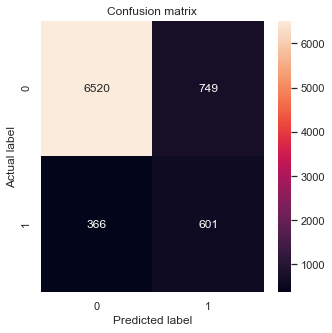

In [267]:
plot_cm(RFclft)

In [268]:
RFclft

RandomForestClassifier(ccp_alpha=0.0001, class_weight='balanced_subsample',
                       max_depth=12, n_estimators=120, n_jobs=-1,
                       random_state=0)

### Reducing Dimension with L1 penalty in linearsvc

In [75]:
X_trns = ct.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_trns, y, test_size = 0.2, random_state = 0)

pipe = Pipeline([('lsvc', SelectFromModel(svm.LinearSVC(penalty="l1", dual=False, random_state=0))
                 ),
                 ('RFt', RFclft
                 )])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "lsvc__estimator__C": [i for i in [0.01, 0.02, 0.04, 0.06, 0.8, 0.1]],  #0.3, 0.5, 0.05,
}

search = GridSearchCV(pipe, param_grid, scoring="f1_macro",  n_jobs=-1)
search.fit(X_train, y_train)


scoring = ["accuracy", "balanced_accuracy", "roc_auc", "f1_macro"]
scores = cross_validate(search.best_estimator_, X_train, y_train, scoring=scoring)

print("best estimator ", search.best_estimator_)

print(tabulate([[round(scores["test_accuracy"].mean(), 2),
                round(scores["test_balanced_accuracy"].mean(), 2),
                round(scores["test_roc_auc"].mean(), 2),
                round(scores["test_f1_macro"].mean(), 2)]], headers=scoring))

best estimator  Pipeline(steps=[('lsvc',
                 SelectFromModel(estimator=LinearSVC(C=0.06, dual=False,
                                                     penalty='l1',
                                                     random_state=0))),
                ('RFt',
                 RandomForestClassifier(ccp_alpha=0.0001,
                                        class_weight='balanced_subsample',
                                        max_depth=12, n_estimators=120,
                                        n_jobs=-1, random_state=0))])
  accuracy    balanced_accuracy    roc_auc    f1_macro
----------  -------------------  ---------  ----------
      0.86                 0.75        0.8         0.7


In [76]:
# Getting the new reduced features data
C_estim = search.best_params_["lsvc__estimator__C"]
model = SelectFromModel(estimator=svm.LinearSVC(C=0.06, dual=False, penalty='l1', random_state=2).fit(X_trns, y),
                        prefit=True)
X_new = model.transform(X_trns)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 0)

feature_idx = model.get_support()
feature_name = pd.get_dummies(df_initial.drop(columns=["duration", "y"])).columns[feature_idx]
print("Number of initial Features %s \nNumber of reduced Features %s \nReduction by %s percent"  
      %(X_trns.shape[1], feature_name.shape[0], round(1- feature_name.shape[0]/X_trns.shape[1], 2)*100))

Number of initial Features 62 
Number of reduced Features 38 
Reduction by 39.0 percent


In [78]:
feature_name

Index(['age', 'campaign', 'cons.price.idx', 'nr.employed', 'job_admin.',
       'job_housemaid', 'job_management', 'job_student', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_high.school',
       'education_illiterate', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

Balanced Accuracy:  0.76
f1 macro:  0.72
Recall score yes:  0.62
F1 score yes:  0.52
AUC Score:  0.82


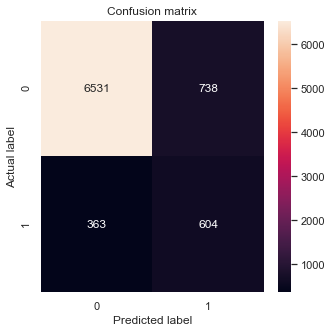

In [152]:
plot_cm(search.best_estimator_)

In [79]:
def plot_roc(name, clf, **kwargs):
    clf.fit(X_train, y_train)
    y_probas = clf.predict_proba(X_test)[::,1]
    fp, tp, _ = metrics.roc_curve(y_test, y_probas, pos_label="yes")
    auc = round(metrics.roc_auc_score(y_test, y_probas),2)

    
    plt.plot(fp*100, tp*100, label=name + " "+ "AUC="+str(auc), linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    #plt.xlim([-0.5,20])
    #plt.ylim([80,100.5])
    #plt.figure(figsize=(9, 6))
    plt.grid(True)

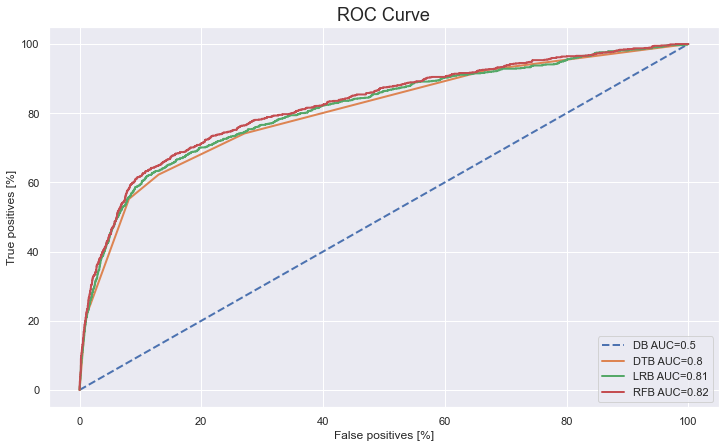

In [80]:
plt.figure(figsize=(12, 7))
plt.title("ROC Curve", fontsize=18)


plot_roc("DB",dummy_clf, linestyle = '--')
plot_roc("DTB", DTclft)
plot_roc("LRB", LR_clft)
plot_roc("RFB",RFclft)
plt.legend(loc='lower right');

In [92]:
def plot_prc(name, clf, **kwargs):
    
    clf.fit(X_train, y_train)
    predictions = clf.predict_proba(X_test)[::,1]
    y_pred = clf.predict(X_test)
    precision, recall, _ =metrics.precision_recall_curve(y_test, predictions, pos_label="yes")
    f1_score = round(metrics.f1_score(y_test, y_pred, average="binary", pos_label="yes"), 2)
    recall_clf = round(metrics.recall_score(y_test, y_pred, pos_label="yes"), 2)
    
    plt.plot(recall, precision, label=name + " " + "f1_score: " + str(f1_score) + " " +  "recall: " + str(recall_clf), 
             linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)

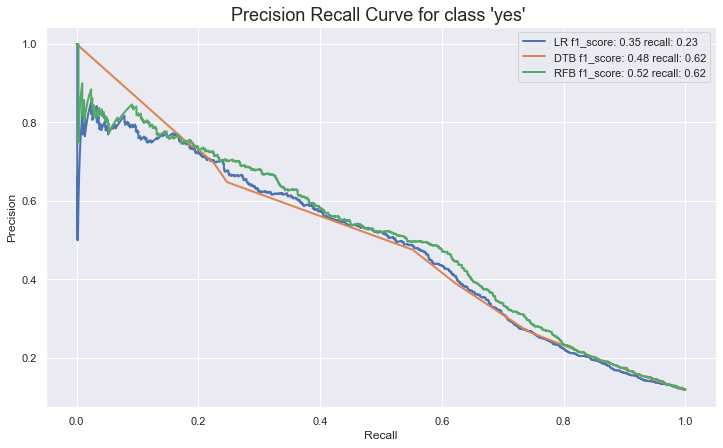

In [93]:
plt.figure(figsize=(12, 7))
plt.title("Precision Recall Curve for class 'yes' ", fontsize=18)

#plot_prc("DB", dummy_clf, linestyle = '--')
plot_prc("LR", LR_clf)
plot_prc("DTB", DTclft)
#plot_prc("LRB", LR_clft)
plot_prc("RFB", RFclft)
plt.legend(loc='best');